In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [2]:
#Training for different batch sizes, with weight statistics: ws

bss=[64,128,256,512,1024]
sch="plateau"
total_epochs=120
step=40
wd=0

def train_prog_bs():
    i=1
    for bs in bss:
        print("Step: " + str(i))
        i=i+1

        name="rmsprop_bs_"+str(bs)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer=torch.optim.RMSprop(net.parameters(), lr=0.1, alpha=0.99, eps=1e-08, weight_decay=wd, momentum=0, centered=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [4]:
az_manage_proc.run_and_delete(log.log_time,train_prog_bs)

Found existing instance, use it.
Logging time
Step: 1
Training


Epoch: 1


In [2]:
#Ojo que este es adam
ms=[0,0.5,0.98]
#wds=[0]
sch="plateau"
total_epochs=160
step=40
bs=128
wd=5e-5

def train_prog():
    print("Step: " + str(1))
    name="adam_"+"bs_"+str(bs) 
    
    save_folder=name+"/"+name
    net=models.resnet18(num_classes=10)
    criterion = nn.CrossEntropyLoss()

    #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=m, weight_decay=wd)
    optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

    if sch=="cosine":
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
    elif sch=="plateau":
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
    elif sch=="exp":
        # Decay LR by a factor of 0.1 every 7 epochs
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)



In [3]:
az_manage_proc.run_and_delete(log.log_time,train_prog)

Found existing instance, use it.
Logging time
Step: 1
Training


Epoch: 1
Saving best..

Epoch: 2
Saving best..

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6
Saving best..

Epoch: 7
Saving best..

Epoch: 8
Saving best..

Epoch: 9

Epoch: 10
Saving best..

Epoch: 11

Epoch: 12
Saving best..

Epoch: 13

Epoch: 14
Saving best..

Epoch: 15
Saving best..

Epoch: 16
Saving best..

Epoch: 17

Epoch: 18
Saving best..

Epoch: 19

Epoch: 20
Saving best..

Epoch: 21
Saving best..

Epoch: 22


In [3]:
#Training for different weight decays, with weight statistics: ws

wds=[0,5e-7,5e-5,5e-3,5e-1]
#wds=[0]
sch="plateau"
total_epochs=100
step=20
bs=128

def train_prog_wd():
    for wd in wds:
        print("Step: " + str(wd))

        name="rmsprop"+"_wd_" + str(wd)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer=torch.optim.RMSprop(net.parameters(), lr=0.1, alpha=0.99, eps=1e-08, weight_decay=wd, momentum=0, centered=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [4]:
#Training for different weight decays, with weight statistics: ws

alphas=[0,0.3,0.6,0.9]
#wds=[0]
sch="plateau"
total_epochs=100
step=20
bs=128
wd=5e-5

def train_prog_alpha():
    for alpha in alphas:
        print("Step: " + str(alpha))

        name="rmsprop"+"_alpha_" + str(alpha)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer=torch.optim.RMSprop(net.parameters(), lr=0.1, alpha=alpha, eps=1e-08, weight_decay=wd, momentum=0, centered=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [5]:
def both_wd_and_alpha():
    train_prog_wd()
    train_prog_alpha()

In [6]:
az_manage_proc.run_and_delete(log.log_time,both_wd_and_alpha)

Found existing instance, use it.
Logging time
Step: 0
Training


Epoch: 1
Saving best..

Epoch: 2

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10
Saving best..

Epoch: 11
Saving best..

Epoch: 12
Saving best..

Epoch: 13
Saving best..

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18
Saving best..

Epoch: 19

Epoch: 20
Saving step..

Epoch: 21
Saving best..

Epoch: 22
Saving best..

Epoch: 23


# Graphs

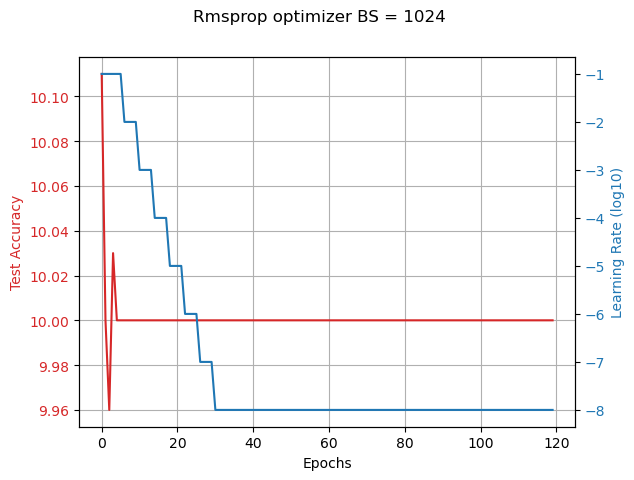

10.11


In [13]:
bs=1024
m=0.5
loaded=utils.load("rmsprop_"+"bs_"+str(bs)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Test Accuracy', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Learning Rate (log10)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle("Rmsprop optimizer BS = "+str(bs))

plt.show()
print(max(loaded["test_acc_v"]))

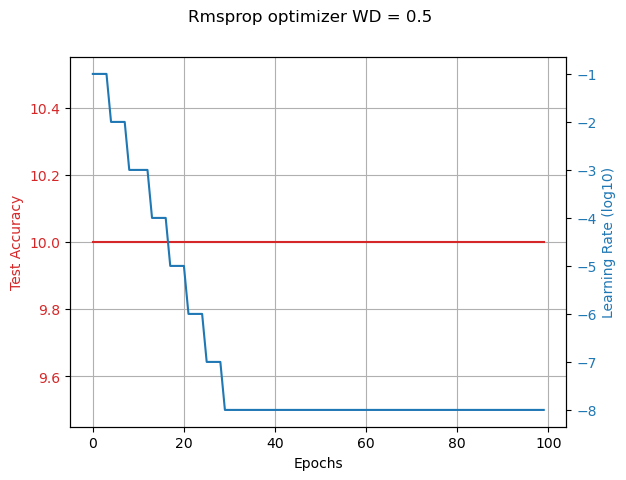

10.0


In [29]:
# Graph for adam wd trains
wd=5e-1
bs=128

loaded=utils.load("rmsprop_"+"wd_"+str(wd)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Test Accuracy', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Learning Rate (log10)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle("Rmsprop optimizer WD = "+str(wd))

plt.show()
print(max(loaded["test_acc_v"]))

# Weight inj

In [5]:
#For epoch 100, 100k injections, weight decay ,azure, here

wds=[0,5e-7,5e-5]
#wds=[0]
sch="plateau"

tot=10000
step=1000
epoch=100

n_exp=5
bs=128

def inj_zero_plateau_epoch_120():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "rmsprop"+"_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_"+ str(epoch)

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        save_data = many_inj.progressive_inj_zero_2(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+ str(epoch)

        utils.save(save_data,save_name)

In [6]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_120)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 5e-07
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000


In [30]:
#For epoch 100, 100k injections, weight decay ,azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=100000
step=10000
epoch=100

n_exp=5
bs=128

def inj_zero_plateau_epoch_120():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "rmsprop"+"_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_"+ str(epoch)

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        save_data = many_inj.progressive_inj_zero_2(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+ str(epoch)

        utils.save(save_data,save_name)

In [31]:
az_manage_proc.run_and_delete_test(log.log_time,inj_zero_plateau_epoch_120)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Weight inj graphs

Inj for: 0
Inj for: 5e-07
Inj for: 5e-05


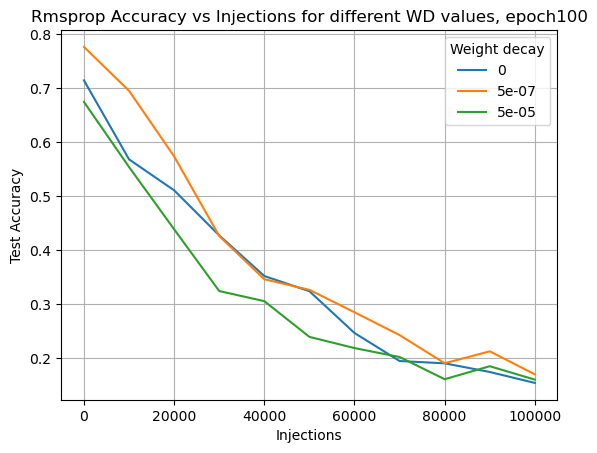

In [6]:
#Graphs for 100k injections, all epoch 160
wds=[0,5e-7,5e-5]
sch="plateau"
tot=100000
step=10000
epoch=100

n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128
#remember to change name

for wd in wds:
    print("Inj for: " + str(wd))
    name = "rmsprop"+"_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Rmsprop Accuracy vs Injections for different WD values, epoch"+str(epoch))
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Test Accuracy")
plt.grid()

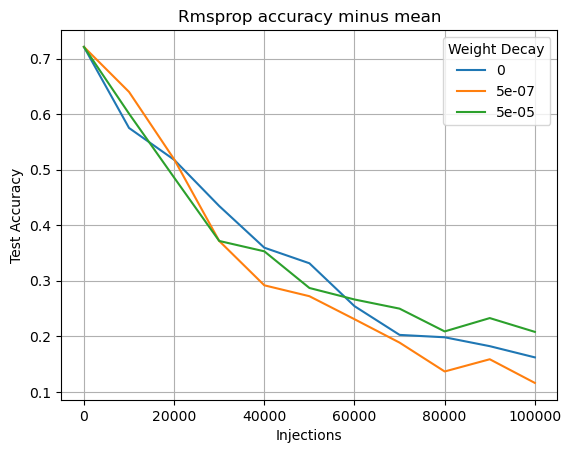

In [11]:
#Graphs for 10k injections, all epoch 120, minus offset

params=[0,5e-7,5e-5]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
epoch=100

bs=128

best_accs=[]
x=np.array(range(0,11))*step

#Change name

for param in params:
    name = "rmsprop"+"_wd_"+str(param)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")

    best_accs.append(loaded["avg"][0])

best_accs_avg=np.mean(best_accs)

for param in params:
    name = "rmsprop"+"_wd_"+str(param)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")

    offset = loaded["avg"][0] - best_accs_avg
    plt.plot(x,(np.array(loaded["avg"]) - offset))

plt.title("Rmsprop accuracy minus mean")
plt.legend(params,title="Weight Decay")
plt.xlabel("Injections")
plt.ylabel("Test Accuracy")
plt.grid()